In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [5]:
oec = pd.read_csv("oec.csv")

In [7]:
oec

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.21960,0.0370,270.60,NaN,NaN,...,16/07/2011,16 01 03,+33 18 13,17.236,0.889,1.3620,-0.310,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.41230,0.0500,190.00,NaN,NaN,...,16/07/2011,16 01 03,+33 18 13,17.236,0.889,1.3620,-0.310,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.05400,0.176891,0.00480,NaN,NaN,NaN,NaN,...,13/07/2015,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.11400,4.194525,0.03900,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.07100,6.356006,0.05200,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.4500,0.000,3584.0,NaN,Controversial
5,Kepler-9 b,0,0.2500,0.84000,19.224180,0.14300,0.0626,NaN,NaN,NaN,...,15/12/2003,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
6,Kepler-9 c,0,0.1700,0.82000,39.031060,0.22900,0.0684,NaN,NaN,NaN,...,15/12/2003,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
7,Kepler-9 d,0,0.0220,0.14700,1.592851,0.02710,NaN,NaN,NaN,NaN,...,14/03/2010,19 02 17,+38 24 03,650.000,1.070,1.0200,0.120,5777.0,NaN,Confirmed planets
8,GJ 160.2 b,0,0.0321,NaN,5.235400,0.05300,0.0600,350.00,NaN,NaN,...,15/04/2021,04 06 34.84136,-20 51 11.2391,43.250,0.690,NaN,NaN,4347.0,NaN,Controversial
9,Kepler-566 b,0,NaN,0.19200,18.427946,NaN,NaN,NaN,NaN,NaN,...,16/05/2010,19 26 13,+47 48 52,NaN,0.830,0.7900,-0.010,5132.0,NaN,Confirmed planets


In [8]:
discoveryMethod.unique()

NameError: name 'discoveryMethod' is not defined

In [11]:
discoveryMethod = oec["DiscoveryMethod"]
def StringToNum(series):
    for i in discoveryMethod:
        if i == 'RV':
            series.replace(0)
        elif i == 'transit':
            series.replace(1)
        elif i == 'micolensing':
            series.replace(2)
        elif i == 'imaging':
            series.replace(3)
        elif i == 'timing':
            series.replace(4)
            
StringToNum(discoveryMethod)

In [0]:
massPeriod = oec[['PeriodDays','PlanetaryMassJpt']]
massPeriod.add(discoveryMethod)

massPeriod = massPeriod[pd.notnull(massPeriod['PeriodDays'])]
massPeriod = massPeriod[pd.notnull(massPeriod['PlanetaryMassJpt'])]
#massPeriod = massPeriod[pd.notnull(massPeriod['DiscoveryMethod'])]
#oec.plot.scatter('PeriodDays','PlanetaryMassJpt', c=discoveryMethod)
#massPeriod

In [2]:
#massPeriod.plot.scatter("PeriodDays", "PlanetaryMassJpt", c="DiscoveryMethod")

In [7]:
semiMajorAxisOrbitalPeriod = oec[["SemiMajorAxisAU", "PeriodDays"]]
semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[pd.notnull(semiMajorAxisOrbitalPeriod['SemiMajorAxisAU'])]
semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[pd.notnull(semiMajorAxisOrbitalPeriod['PeriodDays'])]

,SemiMajorAxisAU,PeriodDays
0,0.21960,39.845800
1,0.41230,102.540000
2,0.00480,0.176891
3,0.03900,4.194525
4,0.05200,6.356006
5,0.14300,19.224180
6,0.22900,39.031060
7,0.02710,1.592851
8,0.05300,5.235400
10,0.04490,3.372650


In [8]:
semiMajorAxisOrbitalPeriod["SemiMajorAxisAUCubed"] = semiMajorAxisOrbitalPeriod["SemiMajorAxisAU"] ** 3
semiMajorAxisOrbitalPeriod["PeriodDaysSquared"] = semiMajorAxisOrbitalPeriod["PeriodDays"] ** 2

semiMajorAxisOrbitalPeriod = semiMajorAxisOrbitalPeriod[semiMajorAxisOrbitalPeriod['SemiMajorAxisAUCubed'] < 1000000]

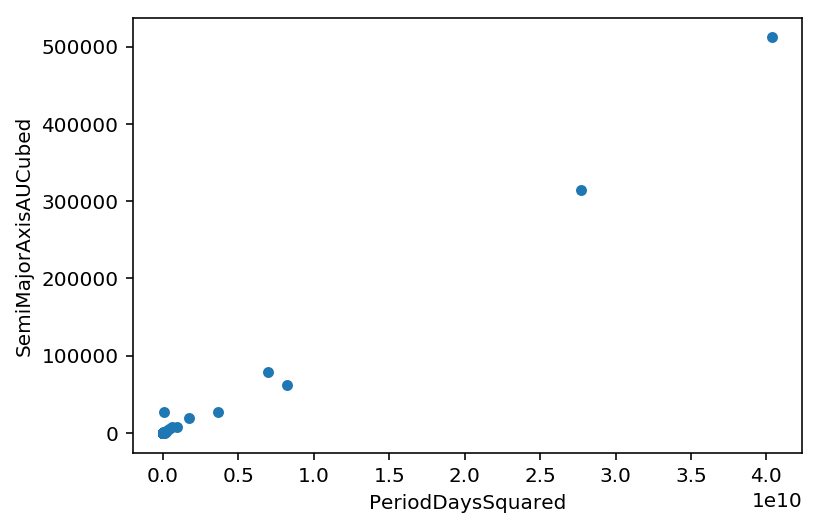

In [9]:
semiMajorAxisOrbitalPeriod.plot.scatter("PeriodDaysSquared", "SemiMajorAxisAUCubed")